In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [445]:
hector_path = "../../../hector.csv"
actuals_path = "../../../out.csv"

In [446]:
hector = pd.read_csv(hector_path)

In [447]:
actuals = pd.read_csv(actuals_path)

In [448]:
hector.head()

,frame_id,sec,nsec,fsec,x,y,ds,theta,dtheta
0,/map,1308817217,652789722,1.308817e+09,0.004860,0.004524,0.749641,0.006640,0.749641
1,/map,1308817217,902741722,1.308817e+09,0.002979,-0.000229,-1.947560,0.005112,-2.697200
2,/map,1308817218,152674722,1.308817e+09,0.003845,-0.000004,0.254286,0.000895,2.201850
3,/map,1308817218,403765722,1.308817e+09,0.001423,0.000549,2.917100,0.002485,2.662810
4,/map,1308817218,653769722,1.308817e+09,0.004017,0.001476,0.343210,0.002755,-2.573880


In [449]:
actuals.head()

,frame,sec,nsec,scan_time,dx,dy,dtheta,x,y,theta,bag_path
0,3420,1308817217,326647722,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Team_Hector_MappingBox_Dagstuhl_Neubau.bag
1,3421,1308817217,351743722,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Team_Hector_MappingBox_Dagstuhl_Neubau.bag
2,3422,1308817217,376696722,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Team_Hector_MappingBox_Dagstuhl_Neubau.bag
3,3423,1308817217,401694722,0.025,0.000988,-0.002963,0.004444,0.000988,-0.002963,0.004444,Team_Hector_MappingBox_Dagstuhl_Neubau.bag
4,3424,1308817217,426730722,0.025,0.000000,0.000000,0.000000,0.000988,-0.002963,0.004444,Team_Hector_MappingBox_Dagstuhl_Neubau.bag


In [450]:
hector.columns

Index(['frame_id', 'sec', 'nsec', 'fsec', 'x', 'y', 'ds', 'theta', 'dtheta'], dtype='object')

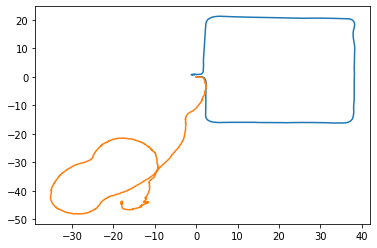

In [451]:
plt.plot(hector.x, hector.y);
plt.plot(actuals.x,actuals.y)

In [452]:
np.sum(actuals.dtheta)

-7.946094635529586

In [453]:
np.sum(hector.dtheta)

-2.3161627862299987

In [454]:
play = actuals.copy()

In [455]:
play['ds'] = np.sqrt(play.dx*play.dx+play.dy*play.dy)

In [456]:
fix = (0.15)/sum(play.ds)

In [457]:
fix

0.000948555016417389

In [458]:
play.dtheta = play.dtheta+fix

In [459]:
new_theta = list()
new_x = list()
new_y = list()

for i in range(len(play)):    
    if i == 0:
        theta = 0
        x = 0
        y = 0
    else:
        theta += play.dtheta[i]+fix*play.ds[i]
        x += play.ds[i]*np.cos(theta)
        y += play.ds[i]*np.sin(theta)
    new_theta.append(theta)
    new_x.append(x)
    new_y.append(y)

play.theta = new_theta
play.x = new_x
play.y = new_y
    #print(i)

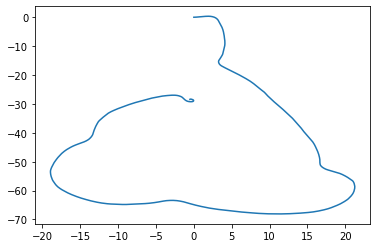

In [460]:
plt.plot(play.x,play.y)

In [461]:
print(len(play))

5987


In [462]:
sum(play.ds)

158.1352661720531